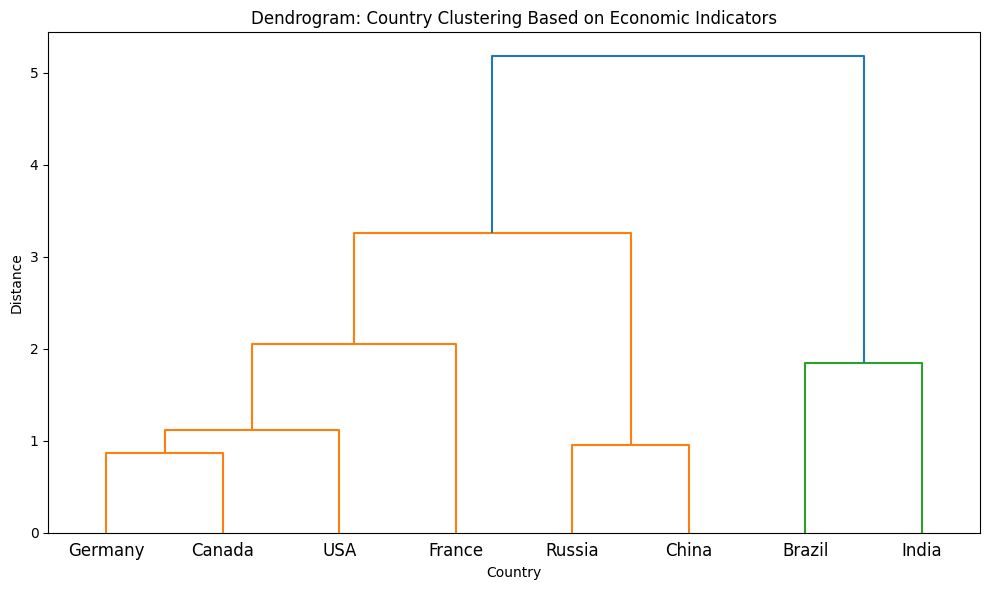

   Country  Cluster
0      USA        3
1   Canada        3
2  Germany        3
3   France        3
4    India        1
5    China        2
6   Brazil        1
7   Russia        2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Sample data: Replace with real-world data as needed
data = {
    'Country': ['USA', 'Canada', 'Germany', 'France', 'India', 'China', 'Brazil', 'Russia'],
    'GDP per Capita': [63000, 46000, 48000, 41000, 2100, 12000, 8800, 11400],
    'Inflation Rate': [2.3, 1.5, 1.4, 1.8, 5.5, 2.1, 4.2, 3.4],
    'Unemployment Rate': [5.2, 6.0, 4.5, 8.0, 7.1, 5.0, 9.8, 4.8]
}

df = pd.DataFrame(data)
X = df[['GDP per Capita', 'Inflation Rate', 'Unemployment Rate']]

# Standardize features (important for distance metrics)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering using Ward's method
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=df['Country'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram: Country Clustering Based on Economic Indicators')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Optional: assign clusters (e.g., 3 clusters)
df['Cluster'] = fcluster(linked, t=3, criterion='maxclust')

# Display clustered data
print(df[['Country', 'Cluster']])
